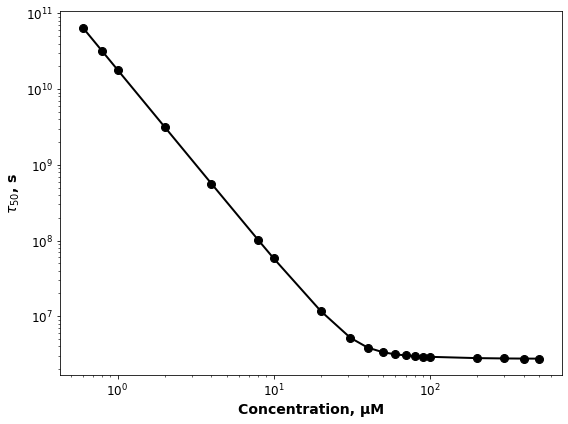

In [5]:
###### Half-time vs Concentrations
###### need to change 1) conc 2) phi_CR  according to the data

#Import the required module
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the function to plot half-time vs concentrations
def plotThalf(x, phi_CR):     ## x = fibril time evolution Data, phi_CR= Critical concentration
    t50 = []                   ##  List to store half_time for each individual concentration
    conc = [0.6, 0.8, 1, 2, 4, 8, 10, 20, 31, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500] # Discrete concentration values in μM
    n=len(conc)  
    for i in range(n):
        cutoff_value = (conc[i] - phi_CR)/2  ### Half of the total fibril mass
        list_I = x[2 * i + 1]              ### Fibril mass in data
        list_II = x[2 * i]                 ### Time in data

        # Select first value meeting the cutoff criterion
        for value_I, value_II in zip(list_I, list_II):
            if value_I >= cutoff_value:
                t50.append(value_II)
                break

    # Interpolation for smooth curve
    f = interp1d(conc, t50, kind='cubic')
    t50_interp = f(conc)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(conc, t50, 'o', color='black', markersize=8)
    plt.plot(conc, t50_interp, '-', color='black', linewidth=2)

    # Axis labels and scales
    plt.xlabel('Concentration, μM', fontsize=14, fontweight='bold')
    plt.ylabel(r'$\tau_{50}$, s', fontsize=14, fontweight='bold')
    plt.xscale('log')
    plt.yscale('log')

    # Tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

########################################Example
plotThalf(np.load('D20_nf4.npy'),0.01)


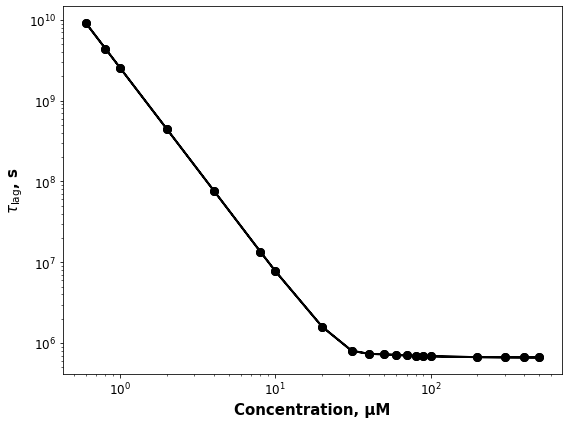

In [31]:
###### Lag-time vs Concentrations
###### need to change 1) conc 2) phi_CR  according to the data

# Import the required module
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

###### Define the function to plot lag-time vs concentrations
def plotTlag(x, phi_CR):     ## x = fibril time evolution Data, phi_CR= Critical concentration
    lag_point = []               ##  List to store lag_time for each individual concentration
    conc = [0.6, 0.8, 1, 2, 4, 8, 10, 20, 31, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500] # Discrete concentration values in μM
    n= len(conc)
    for i in range(n):
        initial_guess = (1, 1, np.median(x[2 * i]))
        fibril_data = x[2 * i + 1] / (conc[i] - phi_CR)     #### Normalized fibril mass in data
        time_data = x[2 * i]                                #### Time in data

        # Filter between 5% and 50% conversion
        mask = (fibril_data >= 0.05) & (fibril_data <= 0.6) ### Create a mask to select the fibril data from 0.05 to 0.6
        list_I = time_data[mask]                            ### masked fibril mass
        list_II = fibril_data[mask]                         ### masked time
        
        # Fit the data, and find the x-intercept and slope
        if len(list_I) >= 2:
            slope, intercept = np.polyfit(list_I, list_II, 1)
            x_intercept = -intercept / slope
            lag_point.append(x_intercept)
            slope_point.append(slope)
        else:
            lag_point.append(np.nan)
            slope_point.append(np.nan)

    # Interpolation
    conc_valid = np.array(conc[:n])[~np.isnan(lag_point)]
    lag_point_valid = np.array(lag_point)[~np.isnan(lag_point)]

    if len(conc_valid) >= 4:
        f = interp1d(conc_valid, lag_point_valid, kind='cubic', fill_value="extrapolate")
        lag_point_new = f(conc[:n])
    else:
        lag_point_new = lag_point  # Not enough data for interpolation

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(np.concatenate([conc[:n], [None], conc[:n]]),np.concatenate([lag_point, [None], lag_point_new]),'-o',color='black', linewidth=2, markersize=8)
    plt.xlabel('Concentration, μM', fontsize=15, fontweight='bold')
    plt.ylabel(r'$\tau_{\mathrm{lag}}$, s', fontsize=15, fontweight='bold')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    
########################################Example
plotTlag(np.load('D20_nf4.npy'),0.01)

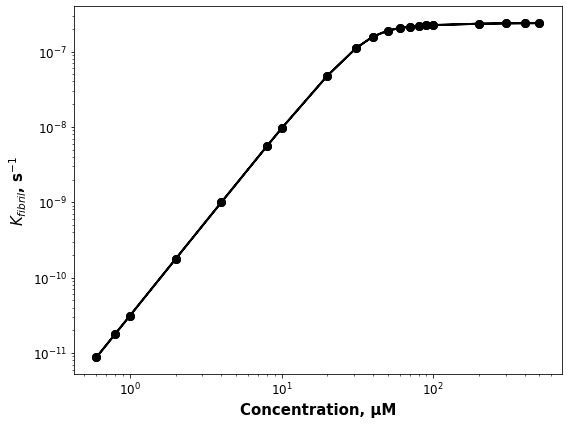

In [39]:
###### Fibril-aggrgation-rate vs Concentrations
###### need to change 1) conc 2) phi_CR  according to the data

# Import the required module
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


###### Define the function to plot aggregation rate vs concentrations
def plotKfibril(x, phi_CR):      ## x = fibril time evolution Data, phi_CR= Critical concentration
    slope_point = []        ##  List to store aggregation rate (slope) for each individual concentration
    conc = [0.6, 0.8, 1, 2, 4, 8, 10, 20,  31, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500] # Discrete concentration values in μM
    n = len(conc)

    for i in range(n):
        fibril_data = x[2 * i + 1] / (conc[i] - phi_CR)      ### Normalized fibril mass
        time_data = x[2 * i]                                 ### Time 

        # Filter between 5% and 60% conversion
        mask = (fibril_data >= 0.05) & (fibril_data <= 0.6)  ### Create a mask to select the fibril data from 0.05 to 0.6
        list_I = time_data[mask]                             ### masked fibril mass
        list_II = fibril_data[mask]                          ### masked time

        # Fit the data, and find the slope
        if len(list_I) >= 2:
            slope, _ = np.polyfit(list_I, list_II, 1)
            slope_point.append(slope)
        else:
            slope_point.append(np.nan)

    # Interpolation for smooth curve
    conc_valid = np.array(conc[:n])[~np.isnan(slope_point)]
    slope_point_valid = np.array(slope_point)[~np.isnan(slope_point)]

    if len(conc_valid) >= 4:
        f = interp1d(conc_valid, slope_point_valid, kind='cubic', fill_value="extrapolate")
        slope_point_new = f(conc[:n])
    else:
        slope_point_new = slope_point  # Not enough data for interpolation

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(np.concatenate([conc[:n], [None], conc[:n]]),np.concatenate([slope_point, [None], slope_point_new]),'-o', color='black', linewidth=2, markersize=8)

    plt.xlabel('Concentration, μM', fontsize=15, fontweight='bold')
    plt.ylabel(r'$K_{fibril}$, s$^{-1}$', fontsize=15, fontweight='bold')
    plt.xscale('log')
    plt.yscale('log')
    #plt.grid(True, which="both", linestyle='--', linewidth=0.7, alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
########################################Example 
plotKfibril(np.load('D20_nf4.npy'),0.01)


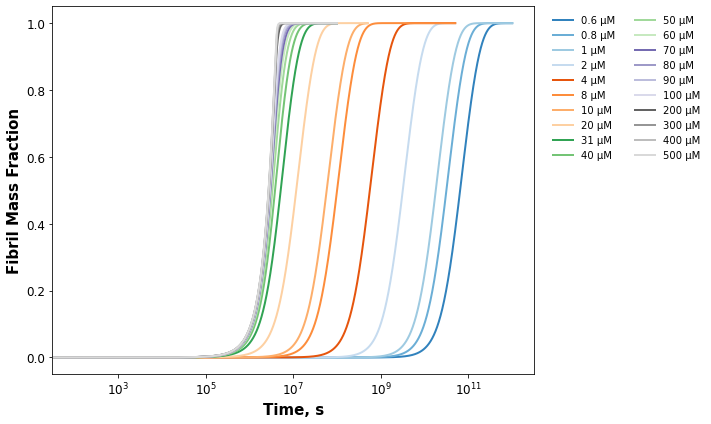

In [59]:
###### To observe the time evolution of all states 
###### To save the time points and corresponding fibril mass in npy files
###### Need to change 1) conc  according to the data
###### We can change X-axis in both linear and log-scale.

# Import the required module
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Define the function to plot fibril mass fraction vs concentrations
def plotFibrilfractions(x, phi_CR):     ## x = fibril time evolution Data, phi_CR= Critical concentration
    conc = [0.6, 0.8, 1, 2, 4, 8, 10, 20, 31, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]     # Discrete concentration values in μM
    max_fibril = [y - phi_CR for y in conc]                                                          # Maximum fibril mass
    n = len(conc)

    # Define color palette
    palette = sns.color_palette("tab20c", n)
    # plotting
    plt.figure(figsize=(10, 6))
    for i, color in enumerate(palette):
        time_data = x[2 * i]                          # Time
        fibril_data = x[2 * i + 1] / max_fibril[i]    # Normalized fibril mass
        plt.plot(time_data, fibril_data, label=f'{conc[i]} μM', color=color, linewidth=2)
    plt.xlabel('Time, s', fontsize=15, fontweight='bold')
    plt.ylabel('Fibril Mass Fraction', fontsize=15, fontweight='bold')
    plt.xscale('log')  ## to make x-axis in log scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, ncol=2, fontsize=10)
    #plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.tight_layout()
    plt.show()
########################################Example 
plotFibrilfractions(np.load('D20_nf4.npy'),0.01)